In [20]:
import polars as pl
import plotnine as p9

In [21]:
df = pl.read_csv("ensemble-ccds-1000.csv")

CAI
0.662264663599275 0.8925146444737251
GC ratio
0.33065595716198126 0.7640264026402641
Uridine depletion
0.03712871287128713 0.41898148148148145
CpG ratio
0.0026595744680851063 0.1476897689768977
Slippery site ratio
0.0 0.054838709677419356
Rare codon ratio
0.018867924528301886 0.1441233140655106
Codon usage bias
0.12335900642802919 0.7888210491299862
Codon bias index
-0.2517116391461941 0.5966386554621849
MFE
-2267.89990234375 -118.4000015258789
MFE (first 100 nt)
-66.0 -2.5
MFE (after 100 nt)
-2227.39990234375 -84.80000305175781
nt length
501 4995
AMFE
-0.5547029602252217 -0.19657032990501566
AMFE (first 100 nt)
-0.66 -0.025
AMFE (after 100 nt)
-0.5569244494541086 -0.17766990291262136
AMFE ratio (first 100 nt / after 100 nt)
0.09149370034261761 2.3418802153004012


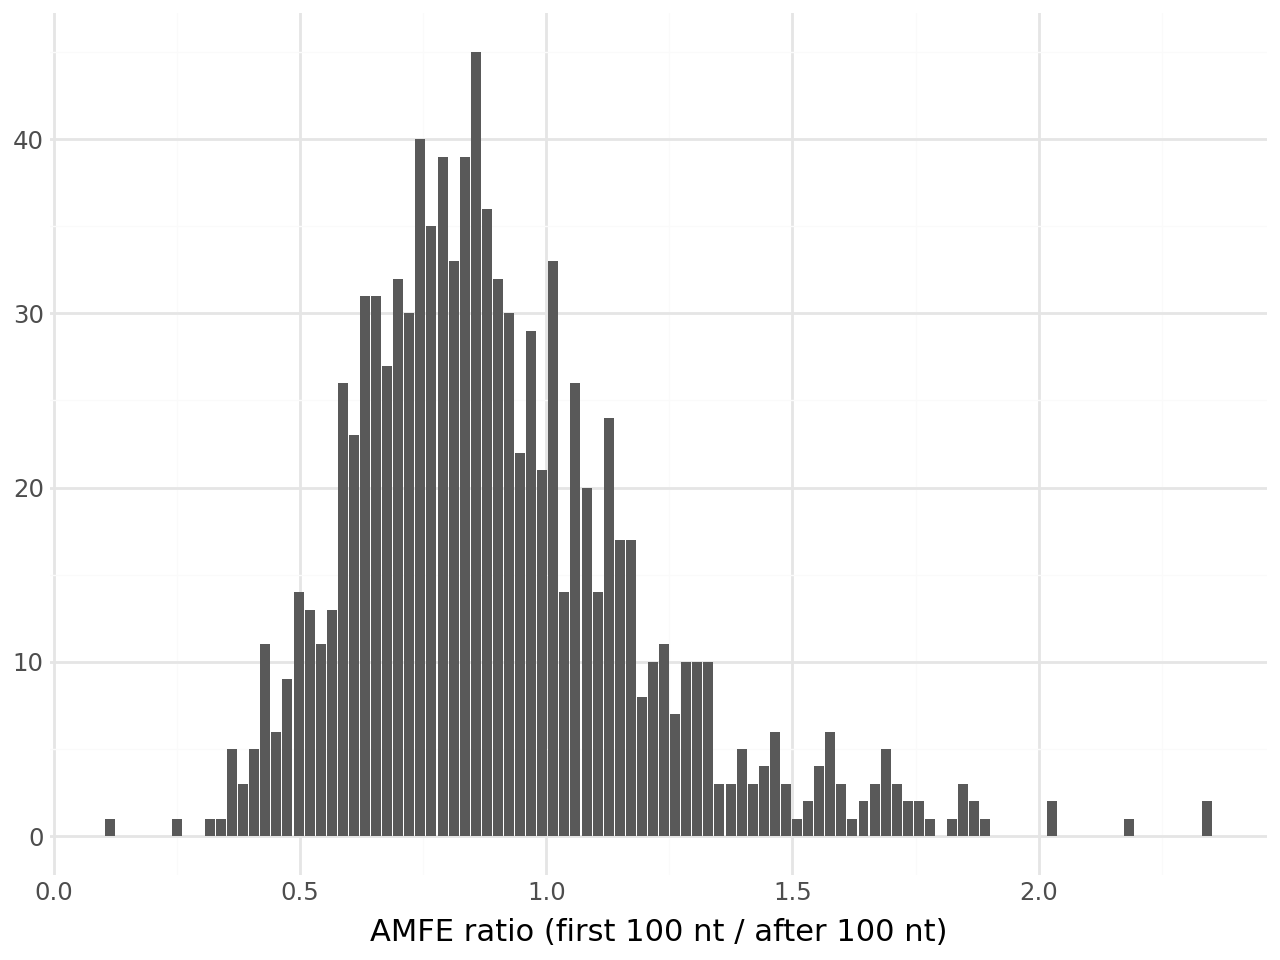

In [22]:
SOURCES = df["source"].unique().to_list()
METRICS = [it for it in df.columns if it not in ["source", "name", "sequence"]]

def _column_name(source: str, metric: str) -> str:
    return f"{source} - {metric}"

def _bins(dataframe, metric, n=100):
    import math

    print(metric)
    _min = min(
        dataframe.select(pl.min(metric)).item()
        for source in SOURCES
    )
    _max = max(
        dataframe.select(pl.max(metric)).item()
        for source in SOURCES
    )
    diff = _max - _min
    print(_min, _max)
    return [_min + diff * it / 100 for it in range(0, n + 1)]


_BINS = {metric: _bins(df, metric) for metric in METRICS}

_df = df["AMFE ratio (first 100 nt / after 100 nt)"].hist(bins=_BINS["AMFE ratio (first 100 nt / after 100 nt)"])
plot = (
        p9.ggplot(_df, p9.aes("breakpoint", "count"))
        # + p9.facet_wrap("source", ncol=1)
        + p9.geom_col(show_legend=False)
        + p9.labs(x="AMFE ratio (first 100 nt / after 100 nt)", y="")
        + p9.theme_minimal()
    )
plot

# plots = None
# for metric in METRICS:
#     print(metric)
#     _df = pl.concat(
#         [
#             df[metric]
#             .hist(bins=_BINS[metric])
#             .with_columns(source=pl.lit(source))
#             for source in SOURCES
#         ]
#     )

#     plot = (
#         p9.ggplot(_df, p9.aes("breakpoint", "count", color="source"))
#         + p9.facet_wrap("source", ncol=1)
#         + p9.geom_col(show_legend=False)
#         + p9.labs(x=metric, y="")
#         + p9.theme_minimal()
#     )
#     if not plots:
#         plots = plot
#     else:
#         plots |= plot

# plots += p9.theme(figure_size=(24, 6))
# plots